# Lógica difusa

La <b>lógica difusa o lógica borrosa</b> fue creada en 1965 por el Profesor Ingeniero Lofti A. Zadeh y surge como respuesta a la rigidez de la lógica clásica/binaria.

En vez de tener valores <b>Verdadero/Falso 0/1</b> utiliza un <b>intervalo completo</b> de valores comprendidos entre <b>0 y 1</b>. Esto lo hace más adaptable a muchos problemas del mundo real.

En el siguiente ejemplo la distancia entre los dos autos puede clasificarse en dos valores: <b>lejos y cerca</b>.

Si la distancia entre los autos se va disminuyendo en el punto especificado en el medio el auto pasará de considerarse lejos para considerarse cerca.

Si se quiere construir un <b>sistema de freno</b> automático que se accione cuando el auto se encuentre cerca de otro para evitar choques entonces este modelo resulta demasiado simple ya que encontrarse en el centro del gráfico y encontrarse justo detrás del otro auto se clasifica de la misma forma al tener un <b>formato binario</b>.


![title](car-classic.png)

Utilizando lógica difusa los autos no se encuentran en una categoría o en la otra sino que <b>pertenecen</b> con diferente intensidad a ambas categorías.

La <b>pertenencia</b> a cada categoría se mide utilizando valores de <b>0 a 1</b> donde:
<ul>
    <li><b>1:</b> Pertenencia total a la categoría</li>
    <li><b>0:</b> Nada de pertenencia</li>
<ul>

![title](car-fuzzy.png)

Si la distancia entre los autos se econtrara en la <b>sección izquierda</b> de la gráfica entonces tendría las siguientes pertenencias:

<ul>
    <li><b>Cerca: </b>0</li>
    <li><b>Lejos: </b>1</li>
</ul>

Si se encontrara en la <b>sección derecha</b> entonces la pertenencia sería:

<ul>
    <li><b>Cerca: </b>1</li>
    <li><b>Lejos: </b>0</li>
</ul>

Y si la distancia se encontrara justo en el medio:

<ul>
    <li><b>Cerca: </b>0.5</li>
    <li><b>Lejos: </b>0.5</li>
</ul>

ya que la medida de distancia pertenecería de igualmente a ambas categorías.

### Ventajas

<ul>
    <li>
        <b>No se necesita un conocimiento detallado del sistema:</b> Un conocimiento aproximado y práctico de los elementos relevantes del sistema suele ser suficiente para permitir la creación de sistemas de control
    </li>
    <li>
        <b>El comportamiento se determina por reglas lingüísticas:</b> Los sistemas pueden definirse por una serie de variables difusas y reglas que pueden ser descriptas con sentencias lógicas sencillas. Ej: Si el auto está muy lejos frenar suavemente     
    </li>
    <li>
        <b>No se necesita reducir o idealizar el sistema</b>: A diferencia de otras técnicas de modelado y simulación no es necesario reducir el sistema a una serie de fórmulas matemáticas
    </li>
    <li>
        <b>Las condiciones son más robustas porque pueden manejar más variabilidad en las entradas</b>
    </li>
    
</ul>


# Sistemas difusos

Para poder crear números difusos es necesario definir el <b>dominio</b> en el que se encontrarán. 
Este dominió será un serie de números que se utilizaran como límite de los valores de los números.

In [1]:
#conda install -c conda-forge scikit-fuzzy 

%matplotlib inline
import numpy as np
import skfuzzy as fuzz
import matplotlib
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

#Creación de dominio
domain = np.arange(0,30,1)
domain

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

## Números difusos

Los números difusos no pueden indicarse por un solo dato ya que su pertenencia a cada valor numérico estará dado por una función.

### Triangular

Para indicar un número difuso con una función triangular es necesario especificar tres valores

- Límite izquierdo
- Punto de mayor pertenencia
- Límite derecho

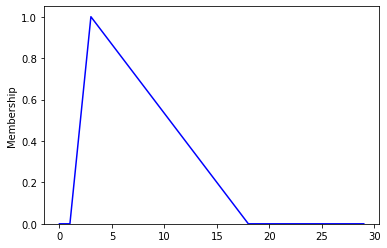

In [4]:
triangular = fuzz.trimf(domain, [1, 3, 18])

#Gráfico
fig, ax = plt.subplots()
ax.plot(domain, triangular, 'b')
ax.set_ylabel('Membership')
ax.set_ylim(-0.00, 1.05);
plt.show()

### Trapecio

Para indicar un número difuso con una función trapezoidal es necesario especificar cuatro valores

- Límite izquierdo
- Punto de mayor pertenencia izquierdo
- Punto de mayor pertenencia derecho
- Límite derecho

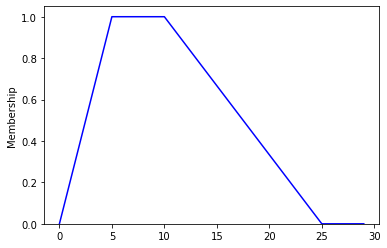

In [4]:
trapezoid = fuzz.trapmf(domain, [0,5,10,25])

#Gráfico
fig, ax = plt.subplots()
ax.plot(domain, trapezoid, 'b')
ax.set_ylabel('Membership')
ax.set_ylim(-0.00, 1.05);
plt.show()

### Función Bell o función de campana

Para indicar un número difuso con una función de campana es necesario especificar tres valores

- Ancho
- Centro
- Pendiente

El resultado está dado por la siguiente función:

y(x) = 1 / (1 + abs([x - c] / a) ** [2 * b])

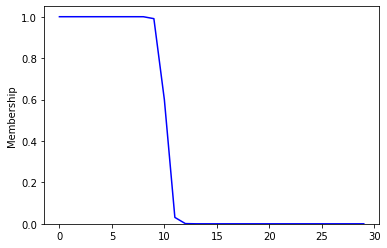

In [6]:
bell = fuzz.gbellmf(domain, 10, 20, 0.1)

#Gráfico
fig, ax = plt.subplots()
ax.plot(domain, bell, 'b')
ax.set_ylabel('Membership')
ax.set_ylim(-0.00, 1.05);
plt.show()

### Función Z

Para indicar un número difuso con una función Z es necesario especificar dos valores

- Límite superior
- Límite inferior

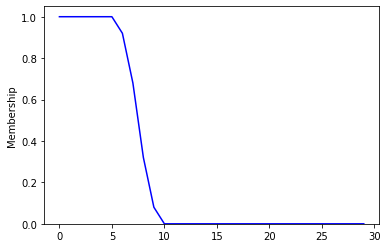

In [5]:
z = fuzz.zmf(domain, 5, 10)

#Gráfico
fig, ax = plt.subplots()
ax.plot(domain, z, 'b')
ax.set_ylabel('Membership')
ax.set_ylim(-0.00, 1.05);
plt.show()

### Sigmoidal

Para indicar un número difuso con una función Sigmoidal es necesario especificar dos valores

- Centro (Punto donde la pertenencia es 0.5)
- Ancho

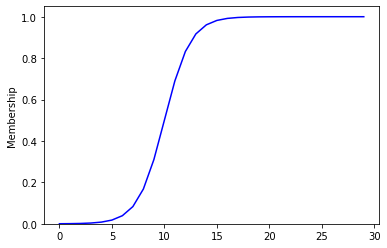

In [10]:
sigmoid = fuzz.sigmf(domain, 10, 0.8)

#Gráfico
fig, ax = plt.subplots()
ax.plot(domain, sigmoid, 'b')
ax.set_ylabel('Membership')
ax.set_ylim(-0.00, 1.05);
plt.show()

### Piecewise

Para indicar un número difuso con una función Piecewise o por partes es necesario especificar tres valores

- a 
- b 
- c

El resultado estará dado por la siguiente fórmula:

y = 0, min(x) <= x <= a y = b(x - a)/c(b - a), a <= x <= b y = x/c, b <= x <= c


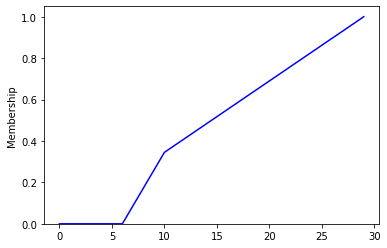

In [7]:
piecewise = fuzz.piecemf(domain, [6,10,11])

#Gráfico
fig, ax = plt.subplots()
ax.plot(domain, piecewise, 'b')
ax.set_ylabel('Membership')
ax.set_ylim(-0.00, 1.05);
plt.show()

### Guassiana

Para indicar un número difuso con una función Gaussiana es necesario especificar tres valores

- Valor central
- Desviación estandar

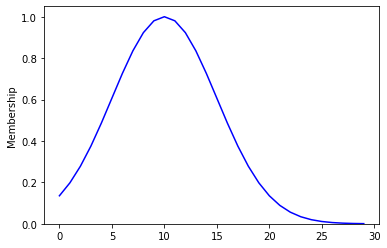

In [2]:
guassian = fuzz.gaussmf(domain, 10,5)

#Gráfico
fig, ax = plt.subplots()
ax.plot(domain, guassian, 'b')
ax.set_ylabel('Membership')
ax.set_ylim(-0.00, 1.05);
plt.show()

## Operaciones con números difusos

### Suma

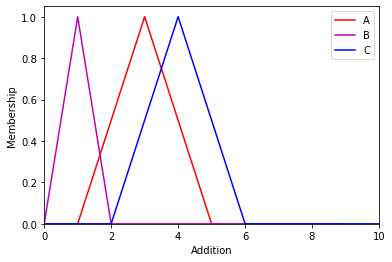

In [17]:
domain = np.arange(0,10,1)

a = fuzz.trimf(domain, [1, 3, 5])
b = fuzz.trimf(domain, [0, 1, 2])
c = fuzz.fuzzy_add(domain,a, domain,b)

fig, ax = plt.subplots()
ax.plot(domain, a, 'r', label = "A")
ax.plot(domain, b, 'm', label = "B")
ax.plot(c[0], c[1], 'b', label = "C")
ax.set_ylabel('Membership')
ax.set_xlabel('Addition')
ax.set_xlim(0, 10);
ax.set_ylim(0, 1.05);
ax.legend()

### Multiplicación

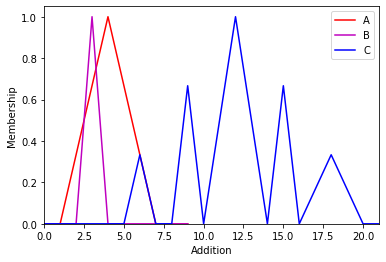

In [18]:
domain = np.arange(0,10,1)

a = fuzz.trimf(domain, [1, 4, 7])
b = fuzz.trimf(domain, [2, 3, 4])
c = fuzz.fuzzy_mult(domain,a, domain,b)

fig, ax = plt.subplots()
ax.plot(domain, a, 'r', label = "A")
ax.plot(domain, b, 'm', label = "B")
ax.plot(c[0], c[1], 'b', label = "C")
ax.set_ylabel('Membership')
ax.set_xlabel('Addition')
ax.set_xlim(0, 21);
ax.set_ylim(0, 1.05);
ax.legend()

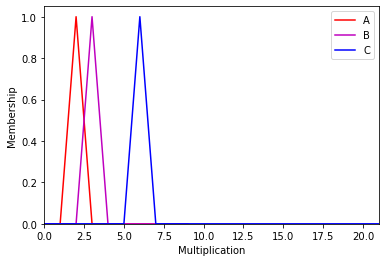

In [19]:
domain = np.arange(0,10,1)

a = fuzz.trimf(domain, [2, 2, 2])
b = fuzz.trimf(domain, [2, 3, 4])
c = fuzz.fuzzy_mult(domain,a, domain,b)

fig, ax = plt.subplots()
ax.plot(domain, a, 'r', label = "A")
ax.plot(domain, b, 'm', label = "B")
ax.plot(c[0], c[1], 'b', label = "C")
ax.set_ylabel('Membership')
ax.set_xlabel('Multiplication')
ax.set_xlim(0, 21);
ax.set_ylim(0, 1.05);
ax.legend()

### Intersección


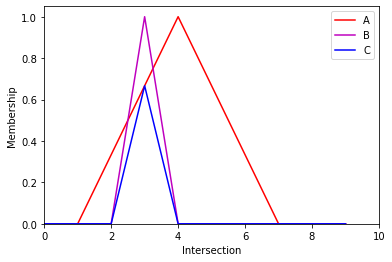

In [20]:
domain = np.arange(0,10,1)

a = fuzz.trimf(domain, [1, 4, 7])
b = fuzz.trimf(domain, [2, 3, 4])
c = fuzz.fuzzy_and(domain,a, domain,b)

fig, ax = plt.subplots()
ax.plot(domain, a, 'r', label = "A")
ax.plot(domain, b, 'm', label = "B")
ax.plot(c[0], c[1], 'b', label = "C")
ax.set_ylabel('Membership')
ax.set_xlabel('Intersection')
ax.set_xlim(0, 10);
ax.set_ylim(0, 1.05);
ax.legend()

### Union

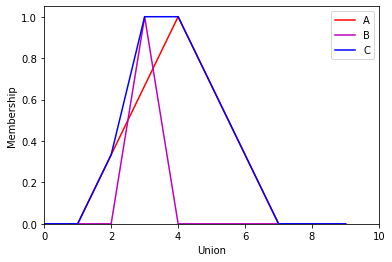

In [13]:
domain = np.arange(0,10,1)

a = fuzz.trimf(domain, [1, 4, 7])
b = fuzz.trimf(domain, [2, 3, 4])
c = fuzz.fuzzy_or(domain,a, domain,b)

fig, ax = plt.subplots()
ax.plot(domain, a, 'r', label = "A")
ax.plot(domain, b, 'm', label = "B")
ax.plot(c[0], c[1], 'b', label = "C")
ax.set_ylabel('Membership')
ax.set_xlabel('Union')
ax.set_xlim(0, 10);
ax.set_ylim(0, 1.05);
ax.legend()

## Fuzzificación

Fuzzy value:0.3333333333333333


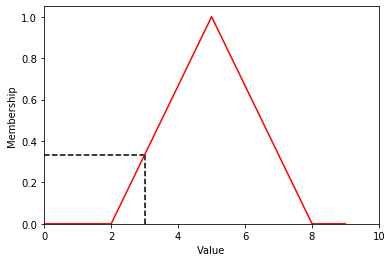

In [14]:
domain = np.arange(0,10,1)

a = fuzz.trimf(domain, [2, 5, 8])

num = 3
mval = np.interp(num, domain, a)
print("Fuzzy value:"+str(mval))

fig, ax = plt.subplots()
ax.plot(domain, a, 'r', label = "A")
plt.vlines(num, 0, mval, linestyle="dashed")
plt.hlines(mval, 0, num, linestyle="dashed")
ax.set_ylabel('Membership')
ax.set_xlabel('Value')
ax.set_xlim(0, 10);
ax.set_ylim(0, 1.05);

## Desfuzificación

La desfuzificación es el proceso de convertir una salida difusa a un número no difuso.
Este proceso dependerá de los distintos niveles de pertenencia de valor difuso en diferentes conjuntos.
Existen diferentes métodos para calcular este número y cada uno puede dar diferentes valores.
El método se seleccionará dependiendo la naturaleza del problema.

### Centro de sumas

Este es uno de los métodos más utilizados. Consiste en contar dos veces las areas solapadas.


### Bisector de Area

Calcula la posición debajo de la curva donde el area en ambos lados sea igual. Particiona el area en dos regiones con la misma area

### Media de máxima

Toma el elemento con el mayor valor de pertenencia. Cuando hay más de un elemento con valores de pertenencia máxima, se toma la media de la máxima.

### Mínima de máxima

Toma el valor más pequeño del domino con máximo valor de pertenencia.

### Máxima de máxima

Toma el valor más grante del dominio con máximo valor de pertenencia.


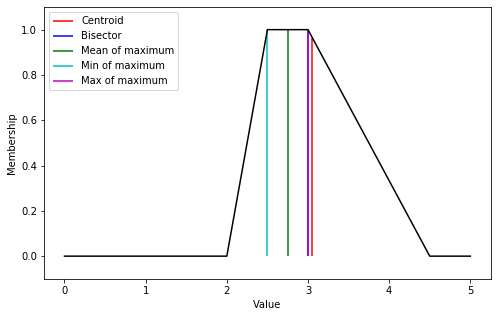

In [25]:
domain = np.arange(0,5.05,0.1)

a = fuzz.trapmf(domain, [2, 2.5, 3, 4.5])
centroid = fuzz.defuzz(domain, a, 'centroid')  # Same as skfuzzy.centroid
bisector = fuzz.defuzz(domain, a, 'bisector')
mom = fuzz.defuzz(domain, a, 'mom')
som = fuzz.defuzz(domain, a, 'som')
lom = fuzz.defuzz(domain, a, 'lom')

labels = ['Centroid', 'Bisector', 'Mean of maximum', 'Min of maximum','Max of maximum']
xvals = [centroid,bisector,mom, som, lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(domain, a, i) for i in xvals]
plt.figure(figsize=(8, 5))
plt.plot(domain, a, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Membership')
plt.xlabel('Value')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()

## Librerías utilizadas

- Scikit-fuzzy 
  https://pythonhosted.org/scikit-fuzzy/
- Numpy
- Matplotlib